# Minimum Spanning Tree

**Given**. Undirected graph *G* with positive edge weights (connected).

**Def**. A <span style="color:blue">spanning tree</span> of *G* is a subgraph *T* that is both a <span style="color:blue">tree</span> (connected and acyclic) and <span style="color:blue">spanning</span> (includes all of the vertices).

**Goal**. Find a min weight spanning tree.

The toy example below has been taken from [here](https://www.pearsonschoolsandfecolleges.co.uk/secondary/Mathematics/16plus/AdvancingMathsForAQA2ndEdition/Samples/SampleMaterial/Chp-01%20001-022.pdf).

In [200]:
import collections
import scipy
import numpy as np
import networkx as nx
from networkx.algorithms.flow import shortest_augmenting_path, build_residual_network
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix # csr = Compressed Sparse Row matrix
from scipy.sparse.csgraph import minimum_spanning_tree

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print('NetworkX version:', nx.__version__)

NetworkX version: 2.1


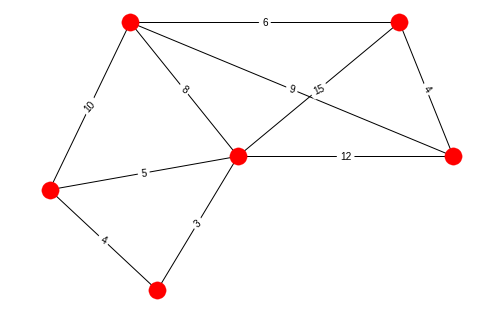

In [201]:
G = nx.Graph() # undirected!
G.add_edge('S', 'B', capacity=10)
G.add_edge('S', 'T', capacity=4)
G.add_edge('S', 'M', capacity=5)
G.add_edge('B', 'M', capacity=8)
G.add_edge('T', 'M', capacity=3)
G.add_edge('B', 'R', capacity=6)
G.add_edge('B', 'O', capacity=9)
G.add_edge('M', 'R', capacity=15)
G.add_edge('M', 'O', capacity=12)
G.add_edge('R', 'O', capacity=4)

fixed_positions = {'S':(1,2.5), 'B':(2.5,5), 'T':(3,1),
                   'M':(4.5,3), 'R':(7.5,5), 'O':(8.5,3)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
labels = nx.get_edge_attributes(G,'capacity')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G, pos)
plt.show()

**Create adjaceny matrix**

In [202]:
A = nx.to_scipy_sparse_matrix(G, nodelist=['S','B','T','M','R','O'], weight='capacity')
print(A.todense())
print('Adjacency Matrix dimensions (rowsxcols): ', A.shape)

[[ 0 10  4  5  0  0]
 [10  0  0  8  6  9]
 [ 4  0  0  3  0  0]
 [ 5  8  3  0 15 12]
 [ 0  6  0 15  0  4]
 [ 0  9  0 12  4  0]]
Adjacency Matrix dimensions (rowsxcols):  (6, 6)


**Extract Minimum Spanning Tree**

In [203]:
Tcsr = minimum_spanning_tree(A) # returns csr matrix
# print(type(Tcsr))
mst = Tcsr.toarray().astype(int)
print(mst)


[[0 0 4 0 0 0]
 [0 0 0 8 6 0]
 [0 0 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 4 0]]


**Build a graph from the MST adjacency matrix**

Minimum Spanning Tree Edges: [('S', 'T'), ('B', 'M'), ('B', 'R'), ('T', 'M'), ('R', 'O')]


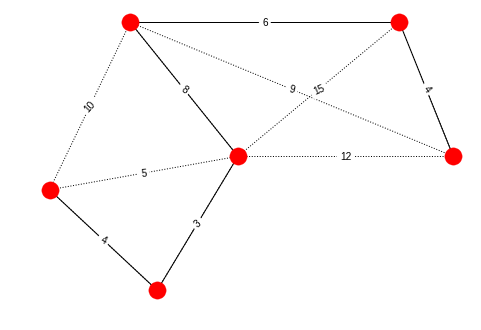

In [204]:
# Convert Minimum Spanning Tree matrix to NetworkX graph
MST=nx.from_numpy_matrix(Tcsr.todense()) # matrix to graph conversion

# map MST graph numeric edges to original edge names from G
mapping={0:'S', 1:'B', 2:'T', 3:'M', 4:'R', 5:'O'}
MST=nx.relabel_nodes(MST,mapping)

# fixed positions for layout
fixed_positions = {'S':(1,2.5), 'B':(2.5,5), 'T':(3,1),
                   'M':(4.5,3), 'R':(7.5,5), 'O':(8.5,3)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
labels = nx.get_edge_attributes(G,'capacity')

# Draw MST Graph
print("Minimum Spanning Tree Edges:", MST.edges)
nx.draw_networkx_edge_labels(MST,pos,edge_labels=labels)
nx.draw_networkx_edges(G, pos, style="dotted")
nx.draw(MST, pos)
plt.show()